In [68]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tqdm import tqdm
import tensorflow as tf



### Data preprocessing 

In [3]:
dataset=[]

In [4]:
folder_paths=['/Users/HP/gender/test/female',
              '/Users/HP/gender/train/female',
              '/Users/HP/gender/test/male',
              '/Users/HP/gender/train/male']

In [5]:
for i in folder_paths:
    folder_name = os.path.basename(i)
    
    # Iterate over the images in the subdirectory
    for file_name in os.listdir(i):
        image_path = os.path.join(i, file_name)
        
        if os.path.isfile(image_path):  # Only consider files
            # Load the image using OpenCV
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # If the image was successfully loaded
            if image is not None:
                # Resize the grayscale image to 250X250 pixels
                resized_image = cv2.resize(image, (64, 64))
                
                # Flatten the image and append each pixel as a separate feature along with the label to the dataset
                flattened_image = resized_image.flatten().tolist()
                dataset.append(flattened_image + [folder_name])

In [7]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset, columns=[f'pixel_{i+1}' for i in range(64*64)] + ['label'])


In [8]:
df

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_4088,pixel_4089,pixel_4090,pixel_4091,pixel_4092,pixel_4093,pixel_4094,pixel_4095,pixel_4096,label
0,67,91,89,68,69,90,75,80,81,67,...,111,71,41,38,24,30,34,29,27,female
1,127,122,120,113,131,132,119,128,129,136,...,38,38,38,38,37,37,36,36,37,female
2,10,10,10,12,16,21,31,41,52,70,...,97,94,112,141,164,172,169,164,159,female
3,49,46,43,42,39,34,33,37,40,42,...,230,217,225,226,236,251,250,245,251,female
4,18,14,16,26,30,30,37,43,46,52,...,120,105,94,84,91,59,33,37,76,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,33,36,46,55,36,39,77,162,225,222,...,171,191,214,227,230,215,203,199,194,male
3687,49,49,48,52,55,65,74,79,86,93,...,135,140,138,147,192,220,232,227,229,male
3688,49,44,64,73,82,90,93,93,96,101,...,88,84,82,84,73,65,91,148,166,male
3689,172,81,36,37,41,53,71,90,96,89,...,127,149,139,136,142,145,144,141,133,male


In [9]:
x = df.iloc[:, :-1] / 255
y = df.iloc[:, -1]

In [10]:
label_encoder = LabelEncoder()
y_encoded =label_encoder.fit_transform(y) 
y_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x , y_encoded , random_state = 42 , test_size= 0.2 )

### Model Creation and Training

In [50]:
model = Sequential()
model.add(Dense(128, activation = 'relu' , input_shape=(64*64,)))
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(16 , activation = 'relu'))
# model.add(Dense(8 , activation = 'sigmoid'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'ADAM' , metrics = ['accuracy'])

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               524416    
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 16)                528       
                                                                 
 dense_30 (Dense)            (None, 1)                 17        
                                                                 
Total params: 535297 (2.04 MB)
Trainable params: 535297 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
history = model.fit(x_train , y_train ,batch_size = 40 , epochs = 100,validation_split = 0.2)

Epoch 1/100
60/60 [==============================] - 2s 18ms/step - loss: 0.6964 - accuracy: 0.5947 - val_loss: 0.7504 - val_accuracy: 0.5753
Epoch 2/100
60/60 [==============================] - 1s 14ms/step - loss: 0.6309 - accuracy: 0.6667 - val_loss: 0.5562 - val_accuracy: 0.6954
Epoch 3/100
60/60 [==============================] - 1s 15ms/step - loss: 0.5624 - accuracy: 0.7039 - val_loss: 0.6445 - val_accuracy: 0.6548
Epoch 4/100
60/60 [==============================] - 1s 15ms/step - loss: 0.5184 - accuracy: 0.7510 - val_loss: 0.6196 - val_accuracy: 0.6684
Epoch 5/100
60/60 [==============================] - 1s 15ms/step - loss: 0.4671 - accuracy: 0.7840 - val_loss: 0.5101 - val_accuracy: 0.7411
Epoch 6/100
60/60 [==============================] - 1s 15ms/step - loss: 0.4369 - accuracy: 0.8064 - val_loss: 0.4307 - val_accuracy: 0.8223
Epoch 7/100
60/60 [==============================] - 1s 15ms/step - loss: 0.4476 - accuracy: 0.7899 - val_loss: 0.6310 - val_accuracy: 0.6701
Epoch 

### Model Evaluation

In [53]:
y_pred = model.predict(x_test)
y_pred


24/24 [==============================] - 0s 4ms/step


array([[6.41727865e-01],
       [9.64656234e-01],
       [3.99719849e-02],
       [6.46591280e-03],
       [6.90273643e-01],
       [1.62144616e-01],
       [3.36910761e-03],
       [1.92798033e-01],
       [4.68832962e-02],
       [9.06077385e-01],
       [5.35165844e-03],
       [7.89173007e-01],
       [9.64656234e-01],
       [4.27120149e-01],
       [1.12473229e-02],
       [9.64656234e-01],
       [6.39227256e-02],
       [9.49652433e-01],
       [4.65674512e-02],
       [9.64656234e-01],
       [9.64656234e-01],
       [7.36556575e-02],
       [5.24828350e-03],
       [9.64656234e-01],
       [1.08080849e-01],
       [9.64656234e-01],
       [1.26549304e-02],
       [1.26739100e-01],
       [8.05302680e-01],
       [6.93617910e-02],
       [3.06319427e-02],
       [1.87819079e-02],
       [3.02145541e-01],
       [4.66487706e-02],
       [9.64656234e-01],
       [5.40341258e-01],
       [5.30949235e-01],
       [3.69527489e-02],
       [6.49349540e-02],
       [2.38597393e-02],


In [59]:
y_pred1=np.where(y_pred>=0.5,1,0)
y_pred1

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    

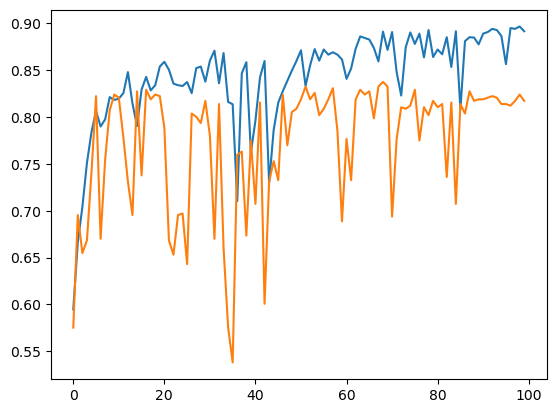

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [60]:
accuracy = accuracy_score(y_test , y_pred1)
accuracy

0.8267929634641408

In [61]:
con_mat = confusion_matrix(y_test,y_pred1)
con_mat

array([[329,  59],
       [ 69, 282]], dtype=int64)

### FeedForward Neural Network Or Multi Layer Perceptron

In [82]:
my_learning_rate = 0.003
def create_model(my_learning_rate):
  
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(64*64,)))
    model.add(tf.keras.layers.Dense(units=32, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.2))
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
    return model  

In [84]:
def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):

    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)

    epochs = history.epoch
    hist = pd.DataFrame(history.history)

    return epochs, hist

learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

my_model = create_model(learning_rate)
epochs, hist = train_model(my_model, x_train, y_train, 
                           epochs, batch_size, validation_split)

list_of_metrics_to_plot = ['accuracy']
# plot_curve(epochs, hist, list_of_metrics_to_plot)

print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test, y=y_test ,batch_size=batch_size)

Epoch 1/50
1/1 [==============================] - 1s 997ms/step - loss: 3.2226 - accuracy: 0.0013 - val_loss: 2.4427 - val_accuracy: 0.5059
Epoch 2/50
1/1 [==============================] - 0s 165ms/step - loss: 2.7667 - accuracy: 0.5028 - val_loss: 7.4474 - val_accuracy: 0.4941
Epoch 3/50
1/1 [==============================] - 0s 156ms/step - loss: 7.3624 - accuracy: 0.4934 - val_loss: 5.5138 - val_accuracy: 0.4941
Epoch 4/50
1/1 [==============================] - 0s 136ms/step - loss: 5.5590 - accuracy: 0.4981 - val_loss: 0.6533 - val_accuracy: 0.6379
Epoch 5/50
1/1 [==============================] - 0s 149ms/step - loss: 1.5940 - accuracy: 0.5172 - val_loss: 4.4625 - val_accuracy: 0.5059
Epoch 6/50
1/1 [==============================] - 0s 150ms/step - loss: 4.4230 - accuracy: 0.5053 - val_loss: 4.3309 - val_accuracy: 0.5059
Epoch 7/50
1/1 [==============================] - 0s 150ms/step - loss: 4.3872 - accuracy: 0.5028 - val_loss: 2.1186 - val_accuracy: 0.5059
Epoch 8/50
1/1 [====

[0.6169599294662476, 0.6765899658203125]

### Model Evaluation

In [85]:
y_pred11=my_model.predict(x_test)

24/24 [==============================] - 0s 3ms/step


In [86]:
y_pred11

array([[5.3055155e-01, 4.6942621e-01, 6.2901739e-17, ..., 1.4057463e-09,
        1.4174135e-11, 1.4086381e-11],
       [2.7239579e-01, 7.2722054e-01, 7.8480489e-14, ..., 1.7165412e-08,
        1.1528792e-09, 6.8056277e-10],
       [6.3396055e-01, 3.6591858e-01, 1.7610922e-13, ..., 1.3042350e-07,
        2.8954159e-09, 3.5870140e-09],
       ...,
       [4.8179954e-01, 5.1804680e-01, 2.8691055e-13, ..., 6.3858835e-08,
        2.7464175e-09, 2.5150251e-09],
       [3.2390627e-01, 6.7584652e-01, 2.2409154e-14, ..., 1.4035670e-08,
        6.1229732e-10, 3.6186057e-10],
       [6.0792071e-01, 3.9205417e-01, 1.9551814e-15, ..., 8.4541423e-09,
        1.4848592e-10, 1.1647328e-10]], dtype=float32)

In [88]:

y_pred2 = np.argmax(y_pred11, axis=1)
y_pred2

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [90]:
cm = confusion_matrix(y_test,y_pred2)
cm

array([[238, 150],
       [ 89, 262]], dtype=int64)

In [93]:
accuracy = accuracy_score(y_test,y_pred2)
accuracy

0.6765899864682002

### Deployement 

In [64]:
path11 = '068.jpg'
image11 = cv2.imread(path11, cv2.IMREAD_GRAYSCALE)
resize11 = cv2.resize(image11, (64, 64)).flatten().reshape(1, -1)
prediction11 = model.predict(resize11)
print("prediction\n",prediction11)
cv2.imshow('Resized Image with Prediction: ' + str(prediction11), image11)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 25ms/step
prediction
 [[0.96465623]]
